UpX Academy - Airlines Project - Bangalore Group - March 2017 Batch
Section1- On delays - Girish Pujar
==================
Questions Addressed:
1. Which Airport has the highest arrival and departure delay and what is the comparison with other airports
2. Which month of the year sees maximum delays?
3. Which hour of the day sees most delays
4. Which Carrier has highest delay
5. Top Eight Destinations with the lowest and highest arrival delays

-----------------------------------Section 1 : Flight Delays------------------------------------------------------------------

In [27]:
import pandas as pd    
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Read the data
airline_data = pd.read_csv('C:/DataScience/AirlinesProject/attachment_Project_1_NYC_Flight_data/flight_data.csv')

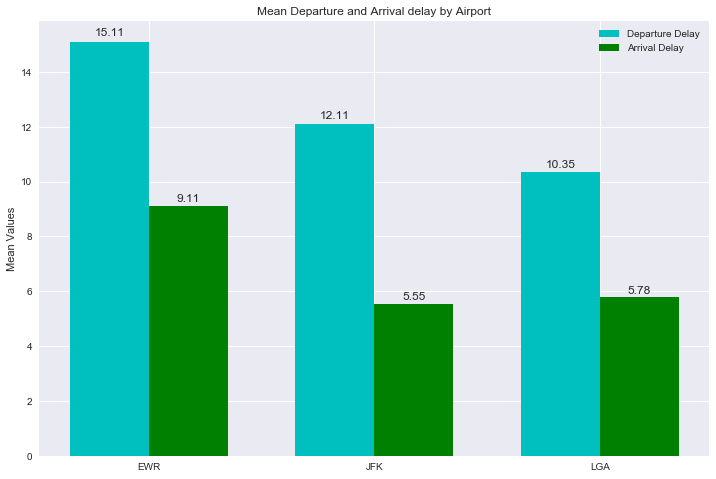

In [29]:
#Which Airport has the highest arrival and departure delay and what is the comparison with other airports
mean_depdelay = airline_data.groupby(['origin']).dep_delay.mean()
mean_arrdelay = airline_data.groupby(['origin']).arr_delay.mean()
N=3
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(ind,mean_depdelay, width, color='c')
rects2 = ax.bar(ind+width,mean_arrdelay, width, color='g')
ax.set_ylabel('Mean Values')
ax.set_title('Mean Departure and Arrival delay by Airport')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('EWR', 'JFK', 'LGA'))
ax.legend((rects1[0], rects2[0]), ('Departure Delay', 'Arrival Delay'))
def autolabel(rects):
     for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.show()

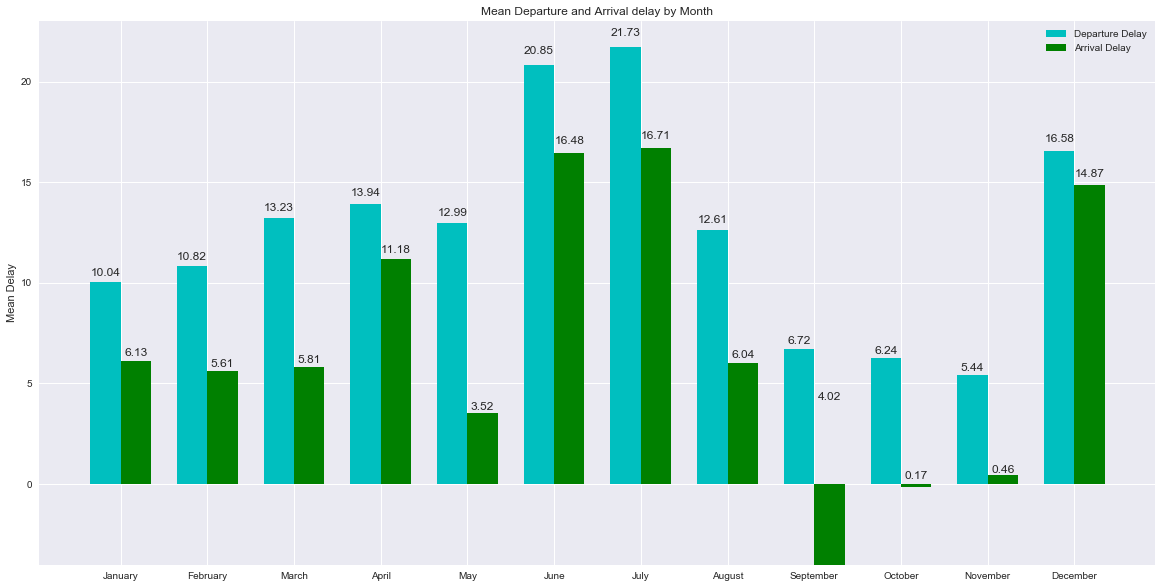

In [30]:
#Which month of the year sees maximum delays?
month_wise_dep_delay = airline_data.groupby(['month']).dep_delay.mean()
month_wise_arr_delay = airline_data.groupby(['month']).arr_delay.mean()
month_wise_arr_delay
N=12
ind = np.arange(N)  # the x locations for the groups
width = 0.35      # the width of the bars
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(ind,month_wise_dep_delay, width, color='c')
rects2 = ax.bar(ind+width,month_wise_arr_delay, width, color='g')
ax.set_xticks(ind + width / 2)
ax.set_ylabel('Mean Delay')
ax.set_title('Mean Departure and Arrival delay by Month')
ax.set_xticklabels(('January', 'February', 'March','April', 'May', 'June','July', 'August', 'September','October', 'November', 'December'))
ax.legend((rects1[0], rects2[0]), ('Departure Delay', 'Arrival Delay'))
def autolabel(rects):
     for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.show()

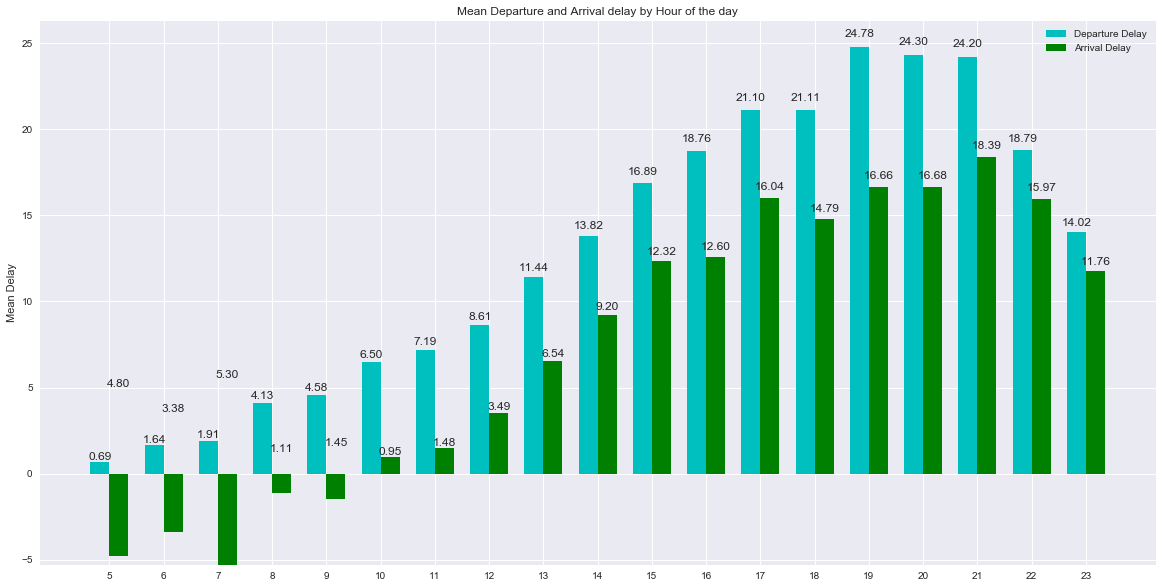

In [31]:
#Which hour of the day sees most delays
hour_wise_dep_delay = airline_data.groupby(['hour']).dep_delay.mean()
hour_wise_arr_delay = airline_data.groupby(['hour']).arr_delay.mean()
hour_wise_dep_delay = hour_wise_dep_delay.dropna()
hour_wise_arr_delay = hour_wise_arr_delay.dropna()
key_list = []
for k in hour_wise_arr_delay.keys():
    key_list.append(str(k))
val = hour_wise_dep_delay.count()
ind = np.arange(val)  # the x locations for the groups
width = 0.35      # the width of the bars
fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(ind,hour_wise_dep_delay, width, color='c')
rects2 = ax.bar(ind+width,hour_wise_arr_delay, width, color='g')
ax.set_xticks(ind + width / 2)
ax.set_ylabel('Mean Delay')
ax.set_title('Mean Departure and Arrival delay by Hour of the day')
ax.set_xticklabels(key_list)
ax.legend((rects1[0], rects2[0]), ('Departure Delay', 'Arrival Delay'))
def autolabel(rects):
     for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%0.2f' % height,
                ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
plt.show()

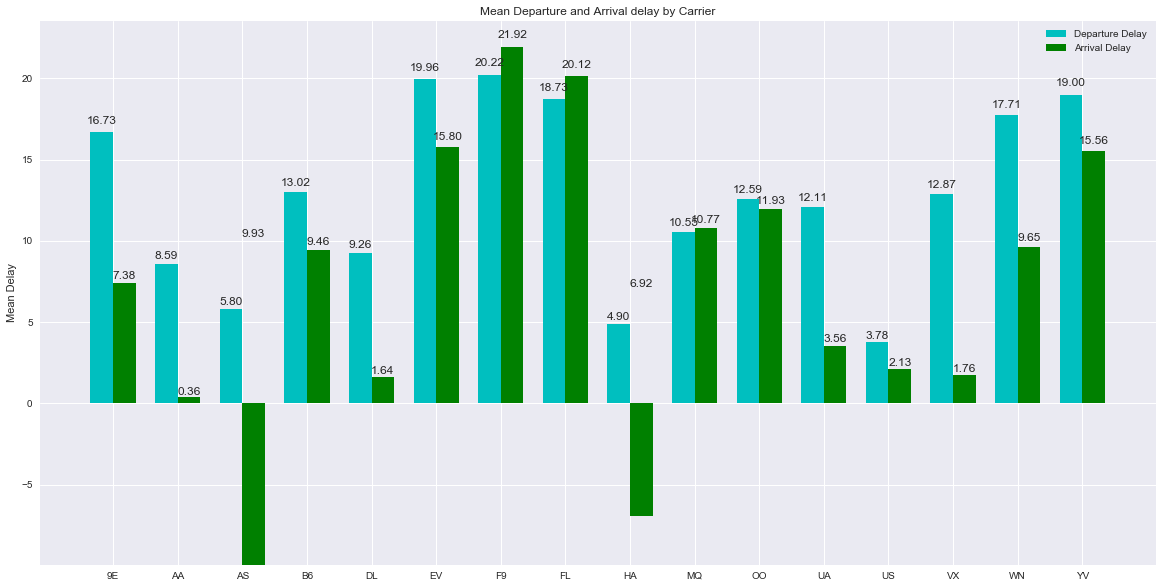

In [32]:
#Which Carrier has highest delay
carrier_wise_dep_delay = airline_data.groupby(['carrier']).dep_delay.mean()
carrier_wise_arr_delay = airline_data.groupby(['carrier']).arr_delay.mean()
carrier_wise_dep_delay = carrier_wise_dep_delay.dropna()
carrier_wise_arr_delay = carrier_wise_arr_delay.dropna()
key_list = []
for k in carrier_wise_arr_delay.keys():
    key_list.append(str(k))
#print(key_list)
val = carrier_wise_dep_delay.count()
ind = np.arange(val)  # the x locations for the groups
width = 0.35      # the width of the bars
fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(ind,carrier_wise_dep_delay, width, color='c')
rects2 = ax.bar(ind+width,carrier_wise_arr_delay, width, color='g')
ax.set_xticks(ind + width / 2)
ax.set_ylabel('Mean Delay')
ax.set_title('Mean Departure and Arrival delay by Carrier')
ax.set_xticklabels(key_list)
ax.legend((rects1[0], rects2[0]), ('Departure Delay', 'Arrival Delay'))
def autolabel(rects):
     for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%0.2f' % height,
                ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
plt.show()

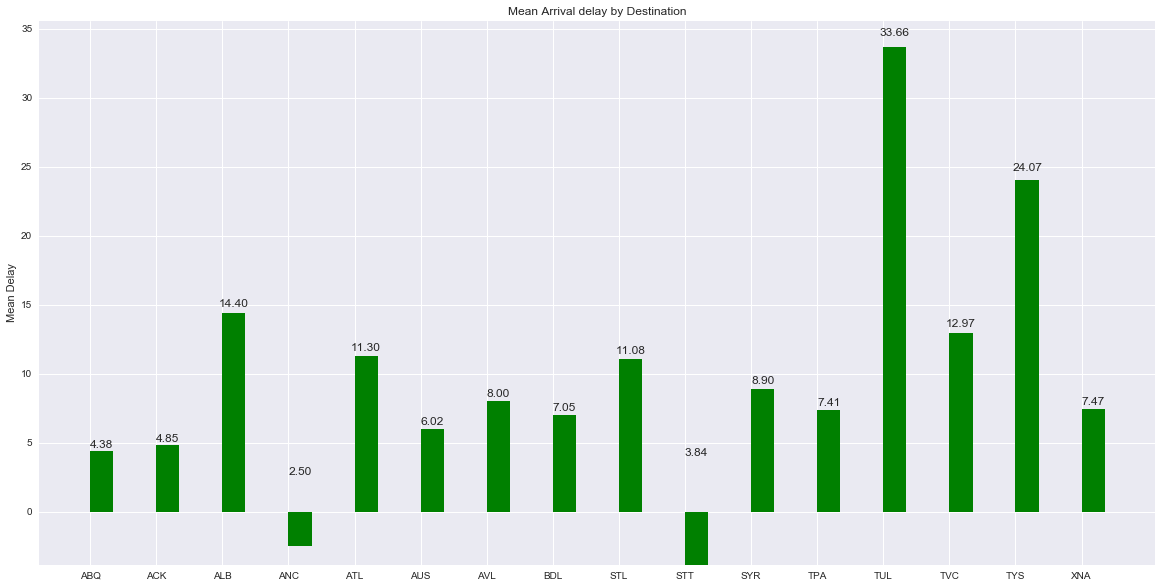

In [33]:
# Top 8 Destination with lowest and highest Arrival delay
dest_wise_arr_delay = airline_data.groupby(['dest']).arr_delay.mean()
dest_wise_arr_delay = dest_wise_arr_delay.dropna()
dest_wise_arr_delay.sort_values()
lowest_8 = dest_wise_arr_delay[:8]
#print(lowest_8)
highest_8 = dest_wise_arr_delay[96:]
#print(highest_8)
top_bottom_8= lowest_8.append(highest_8)
#print(top_bottom_8)
key_list = []
for k in top_bottom_8.keys():
    key_list.append(str(k))
#print(key_list)
val = top_bottom_8.count()
ind = np.arange(val)  # the x locations for the groups
width = 0.35      # the width of the bars
fig, ax = plt.subplots(figsize=(20,10))
rects2 = ax.bar(ind+width,top_bottom_8, width, color='g')
ax.set_xticks(ind + width / 2)
ax.set_ylabel('Mean Delay')
ax.set_title('Mean Arrival delay by Destination')
ax.set_xticklabels(key_list)
#x.legend(rects2,'Arrival Delay')
def autolabel(rects):
     for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%0.2f' % height,
                ha='center', va='bottom')
autolabel(rects2)
plt.show()

UpX Academy - Airlines Project - Bangalore Group - March 2017 Batch
Section1- On delays - Tanguturu Anjan Vijaya Kumar
==========================
Questions Addressed:
1. What is the departure delays by airport?
2. What is the departure delays by carrier in EWR airport?
3. What is the departure delay trend by month


In [34]:
# Airport having Maximum Delays
al = pd.read_csv("C:/DataScience/AirlinesProject/attachment_Project_1_NYC_Flight_data/flight_data.csv")
al_ll = al.groupby(['origin']).sum()

al_ll.reset_index(inplace = True)

al_ll['dep_delay'] = al_ll['dep_delay'].div(1440)

al_ll['arr_delay'] = al_ll['arr_delay'].div(1440)

al_dp = al_ll[['origin','dep_delay','arr_delay']]

#al_dp = al_dp.loc[al_dp['origin'] =='EWR']

al_dp.head()

# Carrier in this Airport having Maximun Delays

al_cc = al.groupby(['carrier','origin']).sum()

al_cc.reset_index(inplace = True)

al_cc['dep_delay'] = al_cc['dep_delay'].div(1440)

al_cc['arr_delay'] = al_cc['arr_delay'].div(1440)

al_cc_o = al_cc[['carrier','origin','dep_delay','arr_delay']]

#al_cc_o.sort_values(by=['dep_delay'],ascending='True')


#  Which Flights of this Carrier in this Airport having Maximun Delays


al_cc_f = al.groupby(['flight','carrier','origin']).sum()

al_cc_f.reset_index(inplace = True)

al_cc_f['dep_delay'] = al_cc_f['dep_delay'].div(1440)

al_cc_f['arr_delay'] = al_cc_f['arr_delay'].div(1440)

al_cc_f = al_cc_f[['flight','carrier','origin','dep_delay','arr_delay']]


al_cc_f = al_cc_f.loc[al_cc_f['carrier'] =='EV']

# Month Wise Delay Analysis for Carrier "EV"

al_cc_m = al.groupby(['month','carrier','origin']).sum()

al_cc_m.reset_index(inplace = True)

al_cc_m['dep_delay'] = al_cc_m['dep_delay'].div(1440)

al_cc_m['arr_delay'] = al_cc_m['arr_delay'].div(1440)

al_cc_m = al_cc_m[['month','carrier','origin','dep_delay','arr_delay']]

#al_cc_m = al_cc_m.loc[al_cc_m['carrier'] =='EV']

#al_cc_m.head(20)

In [35]:
import bokeh
from bokeh.charts import Bar,Histogram,Scatter
from bokeh.models import HoverTool
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, ranges, LabelSet
from bokeh.charts.attributes import ColorAttr, CatAttr
output_notebook()


#al_dep.reset_index(inplace = True)

p1 = Bar(al_dp, CatAttr(columns='origin', sort=False) ,values= 'dep_delay', ylabel="Departure Delay Days",
        title="Departure Delays by Airports", legend=None, tools=['hover','crosshair','wheel_zoom','reset'])

hover = p1.select(dict(type=HoverTool))
hover.tooltips = [('origin','$x'),('dep_delay','$y')]


show(p1)

p2 = Bar(al_cc_o, CatAttr(columns='carrier', sort=True) ,values= 'dep_delay',ylabel="Departure Delay Days",
        title="Departure Delays by Carrier for Airport 'EWR'", legend=None, tools=['hover','crosshair','wheel_zoom','reset'])

hover = p2.select(dict(type=HoverTool))
hover.tooltips = [('carrier','$x'),('dep_delay','$y')]

show(p2)


tooltips=[
    ('Flight', '@flight'),
    ('Dep Delay', '@dep_delay')
]

p3 = Scatter(al_cc_f, x='flight', y='dep_delay', title="Flight vs Departure Delay of Carrier 'EV'",color='flight',
            xlabel="Flight", ylabel="Departure Delay Days",tooltips=tooltips)



hover = p3.select(dict(type=HoverTool))
hover.tooltips = [('flight','$x'),('dep_delay_days','$y')]

show(p3)

# Month Wise Delay Analysis

p4 = Bar(al_cc_m, CatAttr(columns='month', sort=True) ,values= 'dep_delay',ylabel="Departure Delay Days",
        title="Departure Delays by Month", legend=None, tools=['hover','crosshair','wheel_zoom','reset'])

hover = p4.select(dict(type=HoverTool))
hover.tooltips = [('flight','$x'),('dep_delay','$y')]

show(p4)


Loading BokehJS ...

UpX Academy - Airlines Project - Bangalore Group - March 2017 Batch 
                                                                      
                                                                      
Section3- Airline Traffic - Rajiv Ramanjani
======================
Questions Addressed:
1. Which airline has the highest number of flights? How does it compare to other airlines across each of the four quarters?
2. Which flight number has the highest movement in each of the airports and which flights have minimum movement?
3. Which tail number is used most by an airline? How does it compare with other airlines?
4. What month of the year do maximum number of flights depart?

-----------------------------------Section 3 : Airline Traffic------------------------------------------------------------------

In [36]:
#defining the local path of the location of the csv data file
your_local_path="C:/DataScience/AirlinesProject/attachment_Project_1_NYC_Flight_data/"

In [37]:
import matplotlib.mlab as mla

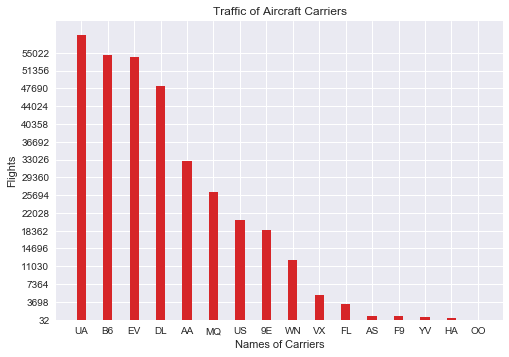

UA Is the carrier with the highest traffic at: 58665 flights in a year.


In [38]:
#Aircraft carrier traffic is depicted in the code of this cell
compudata = pd.read_csv(your_local_path+'flight_data.csv', usecols = ['carrier','flight','tailnum'], encoding='latin-1')
#In the above line we have selected only three columns from the csv file
carr_data = compudata.groupby('carrier').size().sort_values(ascending=False)  #grouping the data based on airlines name
subcount = compudata["carrier"].value_counts() #here the number of flights for each carrier is counted
mx = max(subcount.values) #The maximum number of flights for a carrier is captured here
mi = min(subcount.values) # the minimum number of flights for a carrier is captured here
idx = subcount.index #The unique names of airline carriers are captured from the index part of the subcount 
sz = idx.size #The number of unique names of airline carriers are captured using the size function
interv = int(mx / sz) #The interval size is captured for later use in graph.  This is max / size

#The actual graph definition happens here
yvals = subcount.values  #the values of the y axis are defined here
xvals = np.arange(sz)    # the values of the x are defined here
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(xvals, yvals, width, color='#d62528')   # the actual bar graph is defined here

plt.ylabel('Flights')    # the y axis label is defined here
plt.xlabel('Names of Carriers') # the x axis label is defined here
plt.title('Traffic of Aircraft Carriers') #the chart title is defined here
plt.xticks(xvals, idx) #the values that go into the x axis and the number of these values are defined here
plt.yticks(np.arange(mi, mx, interv)) #The minimum, maximum values and the difference between the two are defined here
plt.show()   #actual display of the graph

print(subcount.index[0],'Is the carrier with the highest traffic at:',mx, 'flights in a year.')  #addon comments to summarize

The comparison of airline traffic across the four quarters of 2013 is given below


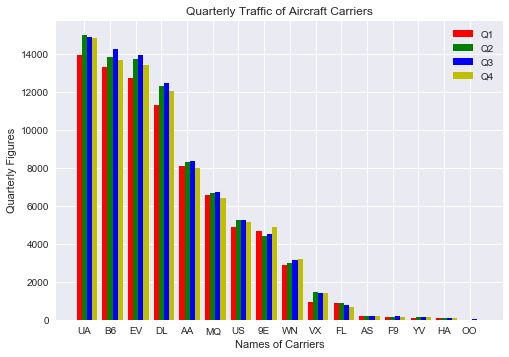

,Q1 Traffic,Q2 Traffic,Q3 Traffic,Q4 Traffic
9E,4659,4410,4490,4901
AA,8098,8282,8352,7997
AS,180,182,184,168
B6,13302,13715,14227,13391
DL,11323,12300,12452,12035
EV,12724,13834,13929,13686
F9,165,170,171,179
FL,940,888,781,651
HA,90,91,87,74
MQ,6571,6673,6730,6423


In [39]:
flight_dat = pd.read_csv(your_local_path+'flight_data.csv', usecols = ['month','carrier','flight']) # read file data
df = pd.DataFrame(flight_dat.values, columns = ['month','carrier','flightnum'])   # select columns
Q1 = df.query('month in (1,2,3)') # filter on first quarter
Q2 = df.query('month in (4,5,6)') # filter on second quarter
Q3 = df.query('month in (7,8,9)') # filter on third quarter
Q4 = df.query('month in (10,11,12)') # filter on fourth quarter
Q1_count = Q1["carrier"].value_counts() #summarize based on flight counts for the quarter
Q2_count = Q2["carrier"].value_counts()
Q3_count = Q3["carrier"].value_counts()
Q4_count = Q4["carrier"].value_counts()
x = [Q1_count.index] #x axis definition
y = [Q1_count.values] #Q1 data representation
z = [Q2_count.values] #Q2 data representation
k = [Q3_count.values] #Q3 data representation
l = [Q4_count.values] #Q4 data representation
print("The comparison of airline traffic across the four quarters of 2013 is given below") #print a summary statement
N = sz 
ind = np.arange(sz)    # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, Q1_count.values, width, color='r')  #Q1 data representation with colours and all
rects2 = ax.bar(ind+width, Q2_count.values, width, color='g') #Q2 data representation with colours and all
rects3 = ax.bar(ind+width*2, Q3_count.values, width, color='b') #Q3 data representation with colours and all
rects4 = ax.bar(ind+width*3, Q4_count.values, width, color='y') #Q4 data representation with colours and all
 
ax.set_ylabel('Quarterly Figures') #Label of y axis
plt.xlabel('Names of Carriers') #Label of x axis
plt.title('Quarterly Traffic of Aircraft Carriers') #Label of chart
ax.set_xticks(ind+width) 
ax.set_xticklabels(idx)
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Q1', 'Q2', 'Q3','Q4') )
  
plt.show()

Q1_count = Q1_count.to_frame('Q1 Traffic')
Q2_count = Q2_count.to_frame('Q2 Traffic')
Q3_count = Q3_count.to_frame('Q3 Traffic')
Q4_count = Q4_count.to_frame('Q4 Traffic')
tabl = pd.concat([Q1_count, Q2_count, Q3_count, Q4_count], axis=1)
tabl

In [40]:
flight_dat2 = pd.read_csv(your_local_path+'flight_data.csv', usecols = ['origin','carrier','flight','tailnum']) #copy file data
df2 = pd.DataFrame(flight_dat2.values,columns=['origin','carrier','flight','tailnum']) #define dataframe
table = pd.pivot_table(flight_dat2, values='tailnum', index=['origin'],columns=['carrier','flight'], aggfunc=len) #
jfk = table.query('origin in "JFK"').T   #filtering data of JFK airport 
jfk = jfk.fillna(0)                      #initializing nan cells to zero
jfk2 = jfk.loc[jfk.idxmax()]             #shortlisting the airline/flight number that has maximum flights
ewr = table.query('origin in "EWR"').T   #filtering data of EWR airport 
ewr = ewr.fillna(0)                       #initializing nan cells to zero
ewr2 = ewr.loc[ewr.idxmax()]             #shortlisting the airline/flight number that has maximum flights
lga = table.query('origin in "LGA"').T   #filtering data of LGA airport 
lga = lga.fillna(0)                      #initializing nan cells to zero
lga2 = lga.loc[lga.idxmax()]             #shortlisting the airline/flight number that has maximum flights
arpt = pd.concat([jfk2, ewr2, lga2], axis=1).fillna(0)  #merge/concatenate the data from individual airports
print("The following flights from the below mentioned three airports have the highest movement") #summary comment
arpt  #display of the top flights that originate from each of the three airports

The following flights from the below mentioned three airports have the highest movement


origin            JFK    EWR    LGA
carrier flight                     
AA      59      365.0    0.0    0.0
        119       0.0  365.0    0.0
        1611      0.0    0.0  365.0

In [41]:
taildata = pd.read_csv(your_local_path+'flight_data.csv', usecols = ['tailnum','carrier'], encoding='latin-1')
#copy the tailnum and airline names data
tal_data = taildata.groupby(['tailnum','carrier']).size() #group based on tailnumber data first and then followed by carrier and
                                                        #add the count of the number of tailnumbers based on size parameter
tal_data = tal_data.sort_values(ascending=False) #sort on descending order of size or number of occurences
print("The top 30 tail numbers that are used most by different airlines are given below") #summary comment
tal_data.head(30)  #the top 30 usages of the tailnumbers along with carriers that correspond to it.


The top 30 tail numbers that are used most by different airlines are given below


tailnum  carrier
N725MQ   MQ         575
N722MQ   MQ         513
N723MQ   MQ         507
N711MQ   MQ         486
N713MQ   MQ         483
N258JB   B6         427
N298JB   B6         407
N353JB   B6         404
N351JB   B6         402
N735MQ   MQ         396
N328AA   AA         393
N338AA   AA         388
N228JB   B6         388
N327AA   AA         387
N335AA   AA         385
N0EGMQ   MQ         371
N324JB   B6         370
N274JB   B6         370
N534MQ   MQ         364
N229JB   B6         364
N542MQ   MQ         363
N190JB   B6         362
N183JB   B6         361
N296JB   B6         357
N323AA   AA         357
N249JB   B6         355
N319AA   AA         354
N336AA   AA         353
N247JB   B6         350
N531MQ   MQ         349
dtype: int64

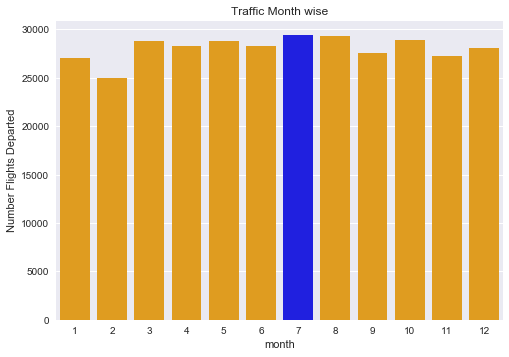

In [42]:
flight_data = pd.read_csv(your_local_path+'flight_data.csv', usecols = ['month'], encoding='latin-1')
flt_data = flight_data.groupby('month').size()
ind1 = flt_data.index.sort_values()
#The actual graph definition happens here
yvals = flt_data.values  #the values of the y axis are defined here
width = 0.60       # the width of the bars
plt.ylabel('Number Flights Departed')    # the y axis label is defined here
plt.title('Traffic Month wise') #the chart title is defined here
#Colouring highest value in different colour using seaborn
clrs = ['orange' if (x < max(flt_data.values)) else 'blue' for x in flt_data.values ]
sns.barplot(x=ind1, y=yvals, palette=clrs) # color=clrs)
plt.show() 

UpX Academy - Airlines Project - Bangalore Group - March 2017 Batch 
                                                                      
                                                                      
Section3- Airline Traffic - Satish
==================================
Questions Addressed:
1. Which airline has flights that cover maximum/minimum distance? How does it compare to other airlines in different distance segments?
2. Which flight number travels the longest distance in each of the airports and which flights travel the minimum distance?


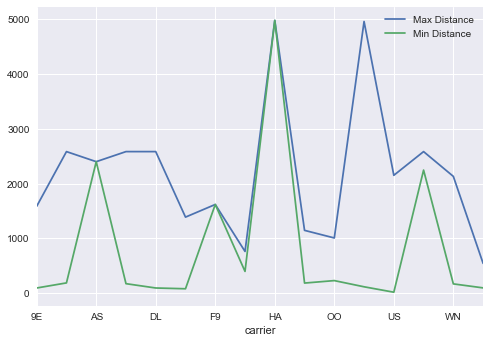

In [43]:
#set file path
local_file_path="C:/DataScience/AirlinesProject/attachment_Project_1_NYC_Flight_data/";

#read file into DF

info = pd.read_csv(local_file_path+'flight_data.csv', sep = ',' ,  parse_dates = [[0,1,2]])

#Group by Carrier and pull the Max  & Min distance for each carrier
carrier_dtls= info.groupby("carrier").agg({'distance' :[np.max,np.min]})

carrier_dtls.distance.amax.plot(label='Max Distance')
carrier_dtls.distance.amin.plot(label='Min Distance')
plt.legend()

                      distance
                           sum
carrier flight origin         
9E      2915   JFK       82069
                      distance
                           sum
carrier flight origin         
UA      15     EWR     1811495
                      distance
                           sum
carrier flight origin         
DL      914    LGA      550800


,distance
,sum
carrier,
9E,425646
AA,943890
AS,566872
B6,899725
DL,777918
EV,385575
F9,335340
FL,229362


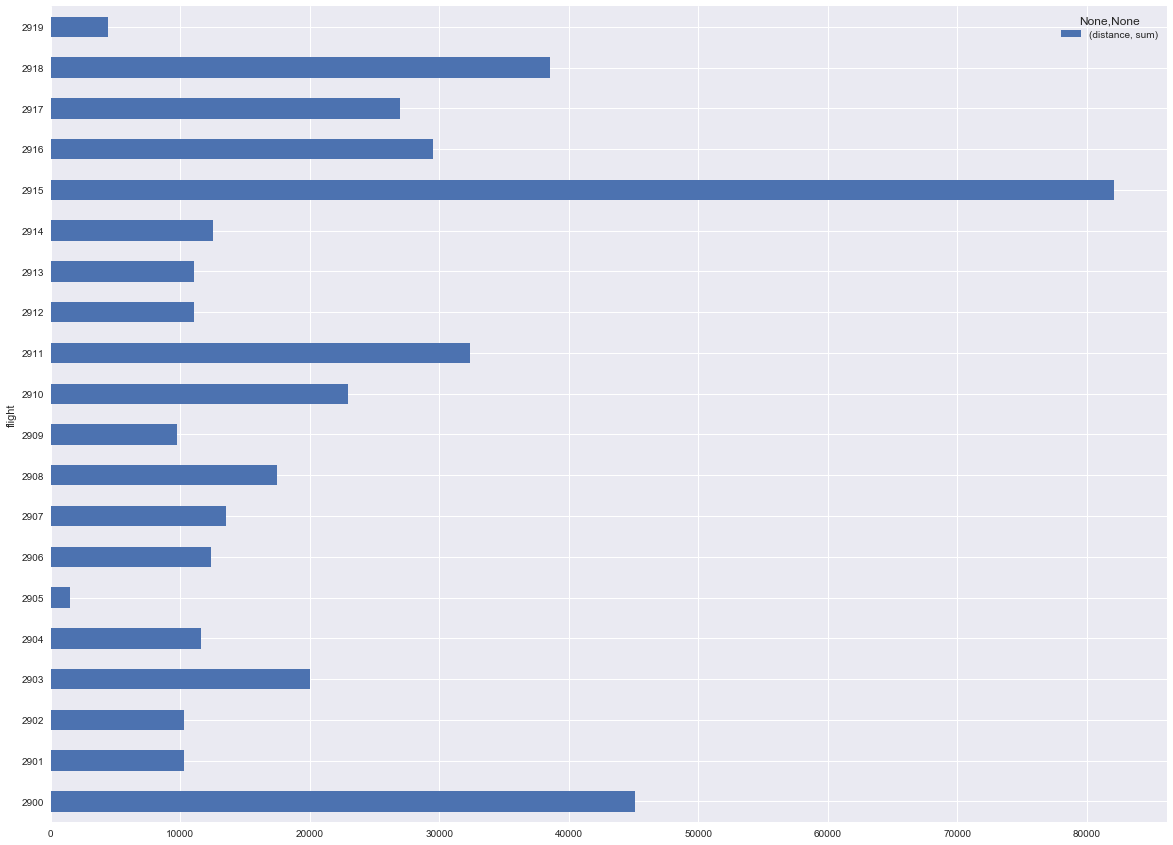

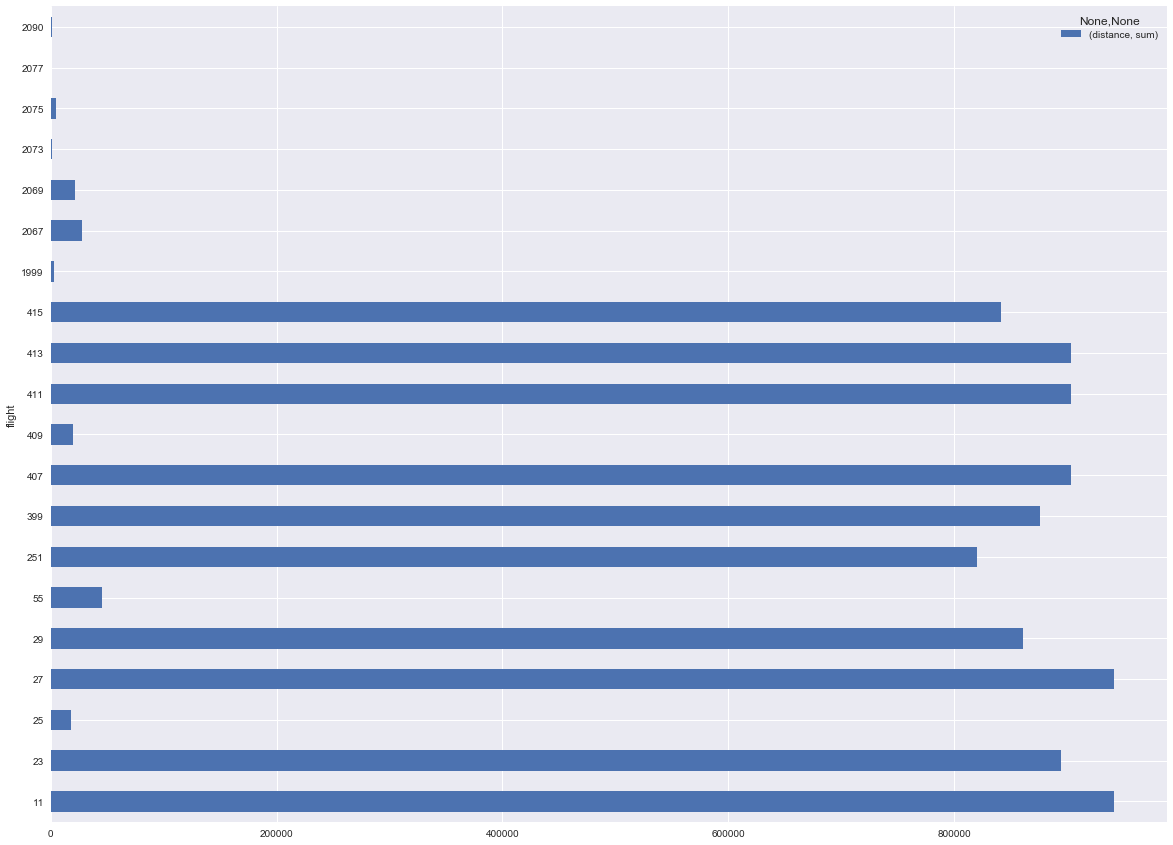

In [45]:
carrier_flight = info.groupby(["carrier","flight","origin"]).agg({'distance' :[np.sum]})
flight_jfk_max = carrier_flight.query('origin in "JFK"').head(20)
flight_jfk_min = carrier_flight.query('origin in "JFK"').tail(20)
flight_ewr = carrier_flight.query('origin in "EWR"')
flight_lga = carrier_flight.query('origin in "LGA"')

jfk_max = flight_jfk_max[flight_jfk_max.values == max(flight_jfk_max.values)]
ewr_max = flight_ewr[flight_ewr.values == max(flight_ewr.values)]
lga_max = flight_lga[flight_lga.values == max(flight_lga.values)]
print(jfk_max)
print(ewr_max)
print(lga_max)
carrier_flight
flight_jfk_max.max(level="flight").plot.barh(figsize=(20, 15),label='Max Distance');#Graphs are not proper due to high number of series.

flight_jfk_min.min(level="flight").plot.barh(figsize=(20, 15),label='Min Distance');#Graphs are not proper due to high number of series.

#carrier_flight.min(level="carrier").plot.barh(figsize=(20, 15),label='Max Distance'); #based on carrier

carrier_flight.min(level="carrier")  #Dataframe for  min distances travesered by the flights belonging to a carrier.
carrier_flight.max(level="carrier")  #Dataframe for  max distances travesered by the flights belonging to a carrier.


UpX Academy - Airlines Project - Bangalore Group - March 2017 Batch 
                                                                      
                                                                      
Section3- Airline Traffic - Sujit
==================================
Questions Addressed:
1. What time/hour of day do maximum number of flights depart?
2. Which origin airport has the highest number of flights? How does it compare to other airports - over each quarter in the year.

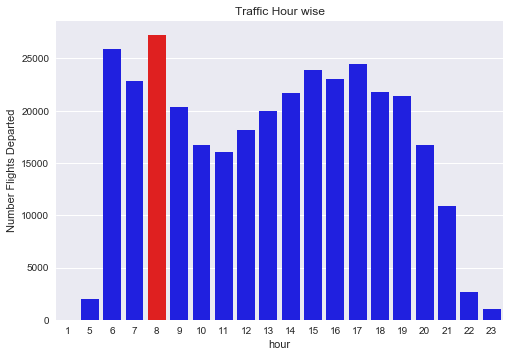

In [46]:
#Question - What time/hour of day do maximum number of flights depart?
#Airport traffic by hourwise is depicted in the code of this cell
flight_data = pd.read_csv(your_local_path+'flight_data.csv', usecols = ['hour'], encoding='latin-1')
flt_data = flight_data.groupby('hour').size()
ind1 = flt_data.index.sort_values()
#The actual graph definition happens here
yvals = flt_data.values  #the values of the y axis are defined here
width = 0.60       # the width of the bars
plt.ylabel('Number Flights Departed')    # the y axis label is defined here
plt.title('Traffic Hour wise') #the chart title is defined here
#Colouring highest value in different colour using seaborn
clrs = ['blue' if (x < max(flt_data.values)) else 'red' for x in flt_data.values ]
sns.barplot(x=ind1, y=yvals, palette=clrs) # color=clrs)
plt.show() 


The comparison of airports - over each quarter in the year


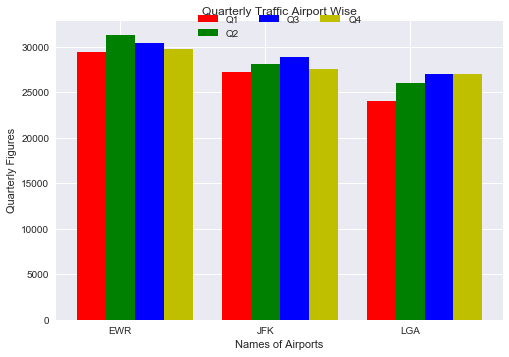

In [47]:
#Which origin airport has the highest number of flights? 
#How does it compare to other airports - over each quarter in the year.
#Aircraft carrier traffic is depicted in the code of this cell
flq_data = pd.read_csv(your_local_path+'flight_data.csv', usecols = ['month','origin'], encoding='latin-1')
df = pd.DataFrame(flq_data.values, columns = ['month','origin'])
Q1 = df.query('month in (1,2,3)')
Q2 = df.query('month in (4,5,6)')
Q3 = df.query('month in (7,8,9)')
Q4 = df.query('month in (10,11,12)')

Q1_count = Q1["origin"].value_counts()
Q2_count = Q2["origin"].value_counts()
Q3_count = Q3["origin"].value_counts()
Q4_count = Q4["origin"].value_counts()

#Rajivs corrections
subcount = flq_data["origin"].value_counts() #here the number of origin airports is counted
mx = max(subcount.values) 
mi = min(subcount.values) 
idx = subcount.index #The unique names of airports are captured from the index part of the subcount 
sz = idx.size #The number of unique names of airports are captured using the size
#Correction ends
x = [Q1_count.index]
y = [Q1_count.values]
z = [Q2_count.values]
k = [Q3_count.values]
l = [Q4_count.values]
print("The comparison of airports - over each quarter in the year")
ind = np.arange(3)    # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, Q1_count.values, width, color='r')
rects2 = ax.bar(ind+width, Q2_count.values, width, color='g')
rects3 = ax.bar(ind+width*2, Q3_count.values, width, color='b')
rects4 = ax.bar(ind+width*3, Q4_count.values, width, color='y')

ax.set_ylabel('Quarterly Figures')
plt.xlabel('Names of Airports')
plt.title('Quarterly Traffic Airport Wise')
ax.set_xticks(ind+width)
ax.set_xticklabels(idx)
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Q1', 'Q2', 'Q3','Q4'), loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [48]:
#Aircraft carrier traffic is depicted in the code of this cell
fl_data = pd.read_csv(your_local_path+'flight_data.csv', usecols = ['origin','dest'], encoding='latin-1')
fl2_data = fl_data.groupby(['origin'], sort=False)['dest'].max()

print ('Maximum flight fly from', fl2_data.index[0], 'to', fl2_data.values[0])

print ('Maximum flight fly from', fl2_data.index[1], 'to', fl2_data.values[1])

print ('Maximum flight fly from', fl2_data.index[2], 'to', fl2_data.values[2])


Maximum flight fly from EWR to XNA
Maximum flight fly from LGA to XNA
Maximum flight fly from JFK to TPA
